In [1]:
DATA_URL = "http://az.lib.ru/g/gogolx_n_w/text_0050.shtml"


In [2]:
! pip install -q PyYaml==5.3.1
! pip install -q rnnmorph==0.4.0
! pip install -q keras==2.1.4
! pip install -q h5py==2.7.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires keras<2.9,>=2.8.0rc0, but you have keras 2.1.4 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires h5py>=2.9.0, but you have h5py 2.7.0 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires keras<2.9,>=2.8.0rc0, but you have keras 2.1.4 which is incompatible.


In [3]:
%tensorflow_version 1.x
import warnings
warnings.filterwarnings('ignore')

from rnnmorph.predictor import RNNMorphPredictor
predictor = RNNMorphPredictor(language="ru")

TensorFlow 1.x selected.


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
import urllib.request

opener = urllib.request.URLopener({})
resource = opener.open(DATA_URL)
raw_text = resource.read().decode(resource.headers.get_content_charset())

In [5]:
raw_text[:200]

'<html>\r\n<head>\r\n<title>Lib.ru/Классика: Гоголь Николай Васильевич. Вий</title>\r\n</head>\r\n\r\n<body>\r\n\r\n\r\n<center>\r\n\r\n<h2><a href=/g/gogolx_n_w/>Гоголь Николай Васильевич</a><br>\r\nВий</h2>\r\n\r\n<!------- П'

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(raw_text, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
cleaned_text = soup.get_text()

In [7]:
cleaned_text[:200]

'\n\nLib.ru/Классика: Гоголь Николай Васильевич. Вий\n\n\n\nГоголь Николай Васильевич\r\nВий\n\n\nLib.ru/Классика:\n\r\n\n\n[Регистрация]\n \n\r\n\r\n\r\n[Найти] \r\n[Рейтинги]\r\n[Обсуждения]\r\n[Новинки]\r\n[Обзоры]\r\n[Помощь]\r\n\r\n\n\n'

In [8]:

from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')

tokenized_sentences = [word_tokenize(sentence) for sentence in sent_tokenize(cleaned_text)]
"A total of %d 'sentences'" % len(tokenized_sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


"A total of 934 'sentences'"

In [9]:
tokenized_sentences[:200]

[['Lib.ru/Классика', ':', 'Гоголь', 'Николай', 'Васильевич', '.'],
 ['Вий',
  'Гоголь',
  'Николай',
  'Васильевич',
  'Вий',
  'Lib.ru/Классика',
  ':',
  '[',
  'Регистрация',
  ']',
  '[',
  'Найти',
  ']',
  '[',
  'Рейтинги',
  ']',
  '[',
  'Обсуждения',
  ']',
  '[',
  'Новинки',
  ']',
  '[',
  'Обзоры',
  ']',
  '[',
  'Помощь',
  ']',
  'Комментарии',
  ':',
  '26',
  ',',
  'последний',
  'от',
  '22/09/2019',
  '.'],
 ['Гоголь',
  'Николай',
  'Васильевич',
  '(',
  'yes',
  '@',
  'lib.ru',
  ')',
  'Год',
  ':',
  '1835',
  'Обновлено',
  ':',
  '28/11/2013',
  '.'],
 ['81k', '.'],
 ['Статистика', '.'],
 ['Глава',
  ':',
  'Проза',
  'Миргород',
  'Скачать',
  'FB2',
  'Оценка',
  ':',
  '5.10*506',
  'Ваша',
  'оценка',
  ':',
  'шедевр',
  'замечательно',
  'очень',
  'хорошо',
  'хорошо',
  'нормально',
  'Не',
  'читал',
  'терпимо',
  'посредственно',
  'плохо',
  'очень',
  'плохо',
  'не',
  'читать',
  'Николай',
  'Васильевич',
  'Гоголь',
  'Вий',
  '[',
  '*',


In [10]:
from tqdm import tqdm
predictions = [[pred.normal_form for pred in sent if pred.normal_form.isalpha() ] 
               for sent in tqdm(predictor.predict_sentences(sentences=tokenized_sentences), "sentences")   ]
predictions[-11:-10]

sentences: 100%|██████████| 934/934 [00:00<00:00, 103491.93it/s]


[['пфейфер', 'он']]

In [11]:
len(predictions)


934

In [12]:
non_uniq_tokens = [word for sentence in predictions for word in sentence]
len(non_uniq_tokens)

11731

In [13]:
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
nltk.download("stopwords")
STOPWORDS = set(stopwords.words("russian"))
stopwords.words("russian")[:5] #Пример стоп слов

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['и', 'в', 'во', 'не', 'что']

In [14]:
tokens =[]
for i in predictions:
    tokens += [*i]
freq = nltk.FreqDist(tokens)
freq


FreqDist({'гоголь': 5,
          'николай': 5,
          'василиевич': 5,
          'вий': 6,
          'регистрация': 1,
          'найти': 4,
          'рейтинг': 1,
          'обсуждение': 1,
          'новинка': 1,
          'обзор': 1,
          'помощь': 1,
          'комментарий': 2,
          'последний': 4,
          'от': 24,
          'yes': 2,
          'год': 6,
          'обновлённый': 2,
          'статистика': 2,
          'глава': 3,
          'проза': 2,
          'миргород': 2,
          'скачать': 1,
          'оценка': 4,
          'ваш': 6,
          'шедевр': 2,
          'замечательный': 2,
          'очень': 10,
          'хорошо': 9,
          'нормально': 2,
          'не': 191,
          'читать': 26,
          'терпимо': 2,
          'посредственно': 2,
          'плохо': 4,
          'быть': 191,
          'колоссальный': 1,
          'создание': 1,
          'простонародный': 1,
          'воображение': 2,
          'такой': 55,
          'имя': 3,
      

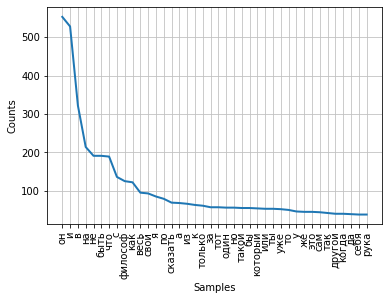

In [15]:
freq.plot(40) 

In [19]:
top_tokens = [token[0] for token in freq.most_common(200)]
s = 0
for token in top_tokens:
    if token in STOPWORDS:
        s += 1
print(s/200)

0.395


In [20]:
callich = [token[1] for token in freq.most_common()]
s = 0
for token in callich:
    if token > 10:
        s += 1


In [21]:
print(s)

161
